slope: 1016.3817120480743 +/- 13.982559532361625
intercept: -0.16982253585910412 +/- 0.17279256410374713


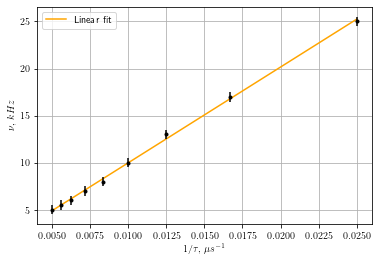

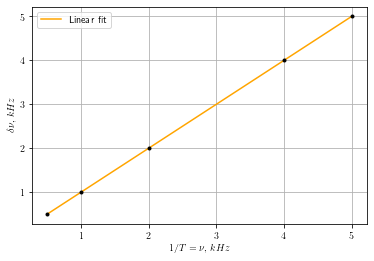

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
from scipy.stats import linregress
plt = reload(plt)

plt.rcParams['text.usetex'] = True
plt.grid()
plt.xlabel(r'$1/\tau,\, \mu s^{-1}$')
plt.ylabel(r'$\nu,\,kHz$')

t = [40, 60, 80, 100, 120, 140, 160, 180, 200]
inv_t = []

for it in t:
    inv_t.append(1/it)

nu = [25, 17, 13, 10, 8, 7, 6, 5.5, 5]
nu_err = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]

#lin_t = [22.02, 24.00, 26.02, 28.02, 30.00, 35.00, 40.00]
#lin_chi = [0.140, 0.214, 0.284, 0.330, 0.397, 0.598, 0.799]

#coef = np.polyfit(t, chi, 5)
#poly = np.poly1d(coef)

coef = np.polyfit(inv_t, nu, 1)
poly = np.poly1d(coef)

p, V = np.polyfit(inv_t, nu, 1, cov=True)
print("slope: {} +/- {}".format(p[0], np.sqrt(V[0][0])))
print("intercept: {} +/- {}".format(p[1], np.sqrt(V[1][1])))

lin_nu = poly(inv_t)
#lin_new_y = lin_poly(lin_t)

plt.plot(inv_t, lin_nu, color = 'orange')
plt.errorbar(inv_t, nu, yerr = nu_err, fmt ='.', color ='black')

#plt.plot(freq_1, volt_1, color = 'orange', marker = '+')
#plt.plot(freq_2, volt_2, color = 'blue', marker = '+')
#plt.axhline(y = 0.707, color = 'red')
plt.legend([r'Linear fit'])
#plt.errorbar(t, sigma, xerr = x_err, yerr = y_err, fmt ='.', color ='black')
plt.savefig('PIC_6.png', dpi = 1200)
plt.show()


plt.grid()
plt.xlabel(r'$1/T = \nu,\,kHz$')
plt.ylabel(r'$\delta\nu,\,kHz$')

nu0 = [0.5, 1, 2, 4, 5]
nu0_err = []

dnu = [0.5, 1, 2, 4, 5]
dnu_err = []

coef = np.polyfit(nu0, dnu, 1)
poly = np.poly1d(coef)
lin_nu = poly(nu0)

plt.plot(nu0, lin_nu, color = 'orange')
plt.errorbar(nu0, dnu, fmt ='.', color ='black')

plt.legend([r'Linear fit'])

plt.savefig('PIC_12.png', dpi = 1200)
plt.show()